# Convolutional Neural Network and MNIST

In this tutorial, we'll be walking through the Tensorflow code behind creating a convolutional neural network. If you'd like more of a conceptual view of how these networks work, check out my [this blog post by Adit](https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/). A CNN tutorial from the Tensorflow docs can also be found [here](https://www.tensorflow.org/tutorials/deep_cnn).

A large part of the coding today will be keeping track of the dimensionality of the inputs, the outputs, the filters, and how they change as we set up the convolutional layers.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Defining the hyperparameters:

In [3]:
# defining hyperparameters
learning_rate = 0.1
num_epochs = 5000
batch_size = 100

So, in this next step, x and y_ act as placeholders that basically just indicate the type of input you want in your CNN and the type of output. For each of these placeholders, you have to specify the type and the shape. 

In [4]:
# defining placeholders
x = tf.placeholder("float", shape = [None, 28, 28 , 1])
y_ = tf.placeholder("float", shape = [None, 10])

### Define some helper functions
We like clean code, so we're going to define functions to make it easier when we need them. The function will be for the convolutions and the pooling layers.

Now keep something in mind: the 4-D input is of the format [batch, in_height, in_width, in_depth], and the 4-D filter is of the format [filter_height, filter_width, filter_depth, count]

(here, count is the number of filters, batch is usually 1 in any single iteration of the convolution)

In [5]:
# padding = 1, strides = 1
# TODO = fill in strides[]
def conv2d(x, w):
  return tf.nn.conv2d(input=x, filter=w, strides=[...], padding="SAME")

# padding = none, strides = 2, filter size = 2
# note that the pool layer isn't parameterized by weights
# TODO = fill in the ksize[] and strides[]
def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[...], strides=[...], padding="VALID")

## Architecture:

INPUT -> [CONV1 -> RELU1 -> POOL1] -> [CONV2 -> RELU2 -> POOL2] -> FC1 -> FC2 -> (SOFTMAX, OUTPUT)

### Define the first Conv-Relu-Pool (Convolutional) layers

Now we get to the good stuff: the conv layers. Here, we have selected the number of filters used will be 32. This is also a hyper parameter. The weights here (w_conv1) is the literally the weight of each filter, and since we're using 32 filters, the weight matrix will be of volume 3x3x32. We're going to be initilizing the values at random from a normal distribution with stddev=0.1.

In [6]:
# TODO = fill in the tf.truncated_normal distribution matrix sizes
w_conv1 = tf.Variable(tf.truncated_normal([...], stddev=0.1))

# TODO = fill in bias variable shape
b_conv1 = tf.Variable(tf.constant(0.1, shape = [...]))

In [7]:
# TODO = fill in arguements for the pre-defined functions
h_conv1 = conv2d(...)
h_relu1 = tf.nn.relu(...)
h_pool1 = max_pool_2x2(...)

print(h_conv1)
print(h_relu1)
print(h_pool1)

Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)


### Define the second Conv-Relu-Pool (Convolutional) layers
In our second Convolution layer, we're going to increase the number of filters from to 64.

In [8]:
# TODO = fill in the tf.truncated_normal distribution matrix sizes
w_conv2 = tf.Variable(tf.truncated_normal([3, 3, 32, 64], stddev=0.1))

# TODO = fill in bias variable shape
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))

In [9]:
h_conv2 = conv2d(h_pool1, w_conv2)
h_relu2 = tf.nn.relu(h_conv2)
h_pool2 = max_pool_2x2(h_relu2)

print(h_conv2)
print(h_relu2)
print(h_pool2)

Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)


### Define the first FC layer
Aaaaaaaaand we step back into more familiar territory. Here, we start working on our fully connected layers, like the ones we did last workshop. We're going to have another hyperparameter here, it beinng the number of hidden units of perceptrons per layer, which we've decided as 1024.

In [10]:
fc_units1 = 1024

# TODO = fill in the size of the weights matrix      [hint: we're trying to consolidate the whole of the 3-D input into 1-D]
w_fc1 = tf.Variable(tf.truncated_normal([..., fc_units1], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[fc_units1]))

# TODO = fill in the size of the input matrix         [hint: it's the same value as above]
h_pool2_flat = tf.reshape(h_pool2, [-1, ...])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, w_fc1) + b_fc1)

print(h_fc1)

Tensor("Relu_2:0", shape=(?, 1024), dtype=float32)


### Define the Output Layer

Remember the output layer is returning the class probabilities (10 classes)

In [11]:
w_fc2 = tf.Variable(tf.truncated_normal([fc_units1, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))

logits = tf.matmul(h_fc1, w_fc2) + b_fc2

print(logits)

Tensor("add_1:0", shape=(?, 10), dtype=float32)


### Softmax! Lost Function! Optimization!
And now starts our backpropogation. We're trying to find how accurate we were to the labels (Loss function using cross entorpy loss), and we're training our optimizer to modify the weights in the most ideal way to give the best accuracy the next iteration. (Though we aren't changing the weights just yet)

In [12]:
cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=logits))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy_loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



### Some metrics to track while training

In [13]:
correct_predictions = tf.equal(tf.argmax(logits, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

### Let's train our model

In [14]:
# initialize tensorflow variables
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [15]:
# run model
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_epochs):
        x_batch, y_batch = mnist.train.next_batch(batch_size)
        x_batch = x_batch.reshape([batch_size, 28, 28, 1]) # we no longer want a flat vector of pixels
        optimizer.run(feed_dict = {x: x_batch, y_: y_batch})
        if i % 100 == 0:
            acc = accuracy.eval(feed_dict = {x: x_batch, y_: y_batch})
            loss = cross_entropy_loss.eval(feed_dict = {x: x_batch, y_: y_batch})
            print("Epoch: {}, accuracy: {}, loss: {}".format(i, acc, loss))

    acc = accuracy.eval(feed_dict = {x: mnist.test.images.reshape([-1, 28, 28, 1]), y_:mnist.test.labels}) # here too
    print("Test accuracy: {}".format(acc))
    saver.save(sess, "./saved_model.ckpt")

Epoch: 0, accuracy: 0.18000000715255737, loss: 3.2322068214416504


KeyboardInterrupt: 

### Print out some pictures like we did for the previous workshops

INFO:tensorflow:Restoring parameters from ./saved_model.ckpt
0.99


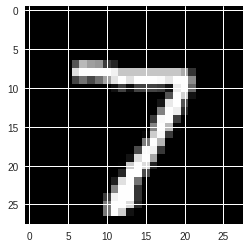

Predition:  7
Actual label:  7


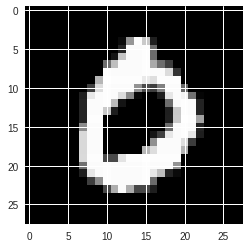

Predition:  0
Actual label:  0


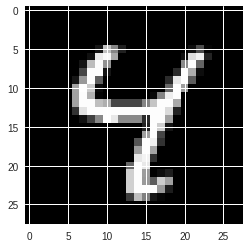

Predition:  4
Actual label:  4


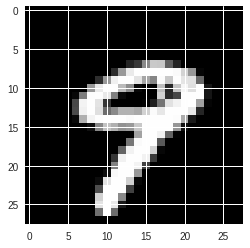

Predition:  9
Actual label:  9


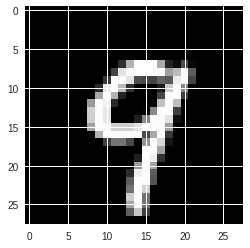

Predition:  9
Actual label:  9


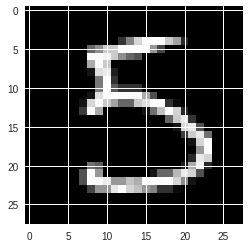

Predition:  5
Actual label:  5


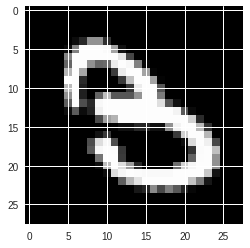

Predition:  8
Actual label:  3


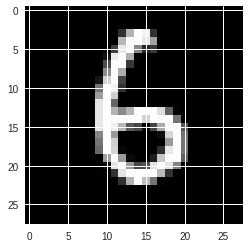

Predition:  6
Actual label:  6


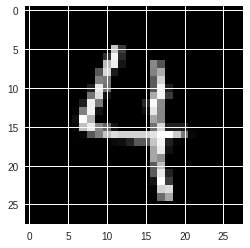

Predition:  4
Actual label:  4


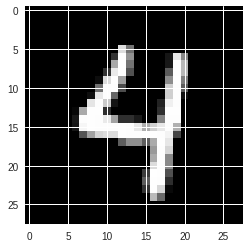

Predition:  4
Actual label:  4


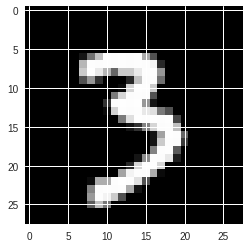

Predition:  3
Actual label:  3


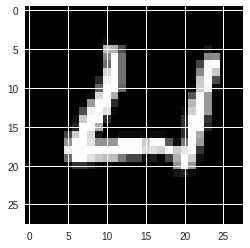

Predition:  4
Actual label:  4


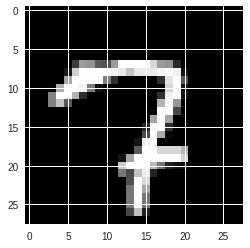

Predition:  7
Actual label:  7


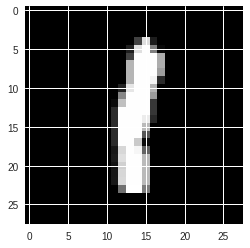

Predition:  1
Actual label:  1


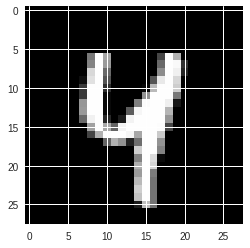

Predition:  4
Actual label:  4


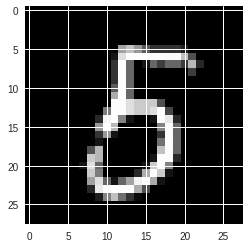

Predition:  5
Actual label:  5


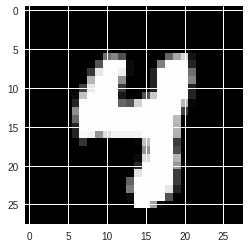

Predition:  4
Actual label:  4


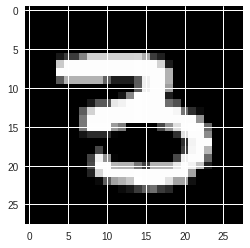

Predition:  3
Actual label:  3


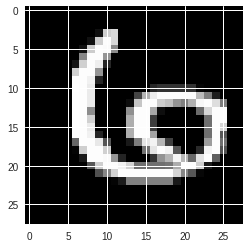

Predition:  6
Actual label:  6


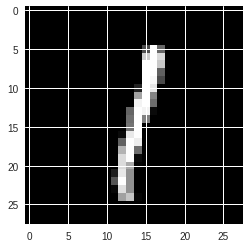

Predition:  1
Actual label:  1


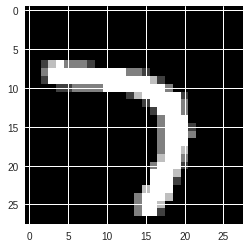

Predition:  7
Actual label:  7


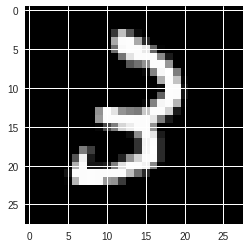

Predition:  3
Actual label:  3


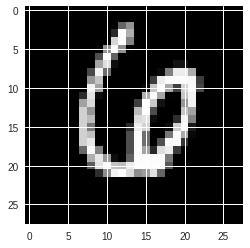

Predition:  6
Actual label:  6


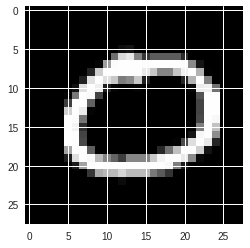

Predition:  0
Actual label:  0


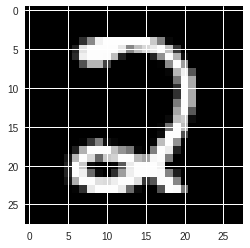

Predition:  2
Actual label:  2


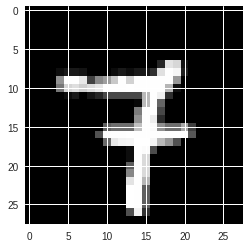

Predition:  7
Actual label:  7


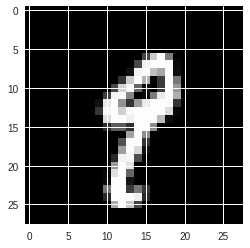

Predition:  9
Actual label:  9


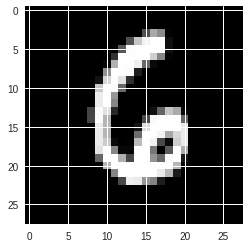

Predition:  6
Actual label:  6


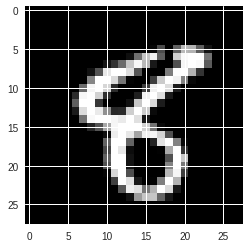

Predition:  8
Actual label:  8


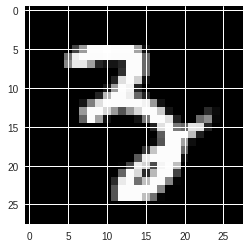

Predition:  3
Actual label:  3


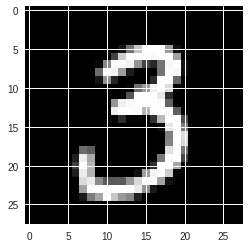

Predition:  3
Actual label:  3


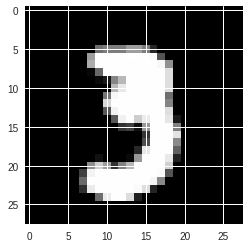

Predition:  3
Actual label:  3


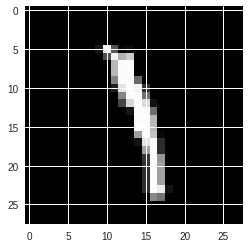

Predition:  1
Actual label:  1


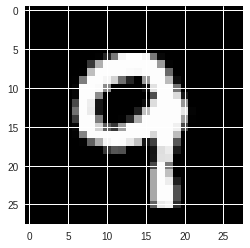

Predition:  9
Actual label:  9


In [23]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    return plt

with tf.Session() as sess:
    saver.restore(sess, "./saved_model.ckpt")
    X_new_scaled = mnist.test.images
    z = logits.eval(feed_dict={x: X_new_scaled.reshape([-1, 28, 28, 1])})
    y_pred = np.argmax(z, axis=1)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(accuracy.eval(feed_dict={x: mnist.test.images.reshape([-1, 28, 28, 1]), y_: mnist.test.labels}))
    for i in range(100):
        if i%3 == 0:
            gen_image(mnist.test.images[i]).show()
            print("Predition: ", y_pred[i])
            print("Actual label: ", np.argmax(mnist.test.labels[i]))